**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from scipy.spatial import distance
from sklearn.neighbors import DistanceMetric
import operator

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
def func(a):
    i,j = np.unique(a,return_counts = True)
    return i[np.argmax(j)]

In [4]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metrics = 'minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metrics = metrics
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass
    
    def predict(self, X):
        self.X_test = np.asarray(X)
        if self.algorithm == 'kd_tree':
            if self.metrics == 'cosine':
                tree = KDTree(self.X_train,leaf_size = 40, metric = 'cosine')
            else:
                tree = KDTree(self.X_train)
            dist, ind = tree.query(self.X_test, k=self.n_neighbors)
            s = self.y_train[ind]
        else:
            y_pred = np.asarray([])
            if self.metrics == 'cosine':
                dist = distance.cdist(self.X_test,self.X_train,'cosine')
            else:
                dist = distance.cdist(self.X_test,self.X_train,'minkowski')
            s = self.y_train[np.argsort(dist,axis=1)[:,0:self.n_neighbors]]
        y_pred = np.apply_along_axis(func,1,s)
        return y_pred
                          

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [5]:
iris = datasets.load_iris()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [7]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [8]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [9]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [10]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [11]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [12]:
%time clf.predict(X_test)

Wall time: 2 ms


array([2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1])

In [13]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [14]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [16]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [17]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [18]:
%time clf.predict(X_test)

Wall time: 1.96 ms


array([1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0])

In [19]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0])

In [20]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [21]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [22]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [23]:
count_vect = CountVectorizer(max_features = 500)
X = count_vect.fit_transform(newsgroups.data).toarray()
y = target

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf.fit(X,y)
cross_val_score(clf,X,y,cv=3, scoring='accuracy')

array([0.16012725, 0.15804826, 0.1516839 ])

In [26]:
scores_data = pd.DataFrame()

In [27]:
count_vect = CountVectorizer(max_features = 500 )
X = count_vect.fit_transform(newsgroups.data).toarray()
y = target

In [29]:
best_k, scores_data = Best_k_neighbors(X,y, cv = 3, metrics = 'minkowski') #сначала нужно запустить следующую вкладку (работать будет долго минут 15)

In [30]:
scores_data.head(10)

,K,cross_val_score
0,1,0.168375
0,2,0.156178
0,3,0.156266
0,4,0.158034
0,5,0.160774
0,6,0.160067
0,7,0.163249
0,8,0.167492
0,9,0.167669
0,10,0.169260


In [31]:
scores_data_cos = pd.DataFrame()

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X).toarray()

In [35]:
best_k_cos, scores_data_cos = Best_k_neighbors(X,y, cv = 3, metrics = 'cosine')

In [36]:
scores_data_cos.head(10)

,K,cross_val_score
0,1,0.356727
0,2,0.336221
0,3,0.349391
0,4,0.354340
0,5,0.365389
0,6,0.370604
0,7,0.375200
0,8,0.377940
0,9,0.378735
0,10,0.379884


In [37]:
best_k_cos,best_k

(10, 10)

In [44]:
scores_data_cos['cross_val_score'].max(),scores_data['cross_val_score'].max() #делаем вывод, что при к=8 и косинусной метрика наил рез

(0.37988377376077737, 0.16925987417322896)

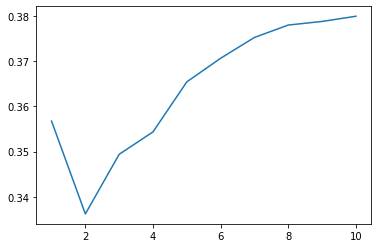

In [45]:
plt.plot(scores_data_cos['K'],scores_data_cos['cross_val_score'])
plt.show()

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [28]:
def Best_k_neighbors(X, y,metrics, cv = 3):
    scores_data = pd.DataFrame()
    if metrics == 'cosine':
        for i in range(1,11):
            clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metrics = 'cosine')
            clf.fit(X,y)
            mean_cross_val_score = cross_val_score(clf, X, y, cv=3,scoring ='accuracy' ).mean()
            temp_score_data = [{'K' : i, 'cross_val_score' : mean_cross_val_score}]
            scores_data = scores_data.append(temp_score_data)
    else:
        for i in range(1,11):
            clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
            clf.fit(X,y)
            mean_cross_val_score = cross_val_score(clf, X, y, cv=3,scoring ='accuracy' ).mean()
            temp_score_data = [{'K' : i, 'cross_val_score' : mean_cross_val_score}]
            scores_data = scores_data.append(temp_score_data)
    best_k = np.argmax(scores_data['cross_val_score'])+1
    return best_k,scores_data

In [66]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X).toarray()

In [38]:
my_clf = MyKNeighborsClassifier(n_neighbors=best_k_cos, algorithm='brute', metrics = 'cosine') #выкатываем свою лучшую модель
my_clf.fit(X,y)

In [78]:
KDTree.valid_metrics # делаю вывод, что KDTree не работает с косинусной метрикой, поэтому использую brute

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity']

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [39]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [40]:
data = newsgroups['data']
target = newsgroups['target']

In [41]:
X_pred = count_vect.transform(newsgroups.data).toarray()
y_pred = target
X_pred = tfidf_transformer.transform(X_pred).toarray()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [42]:
y_my_pred = my_clf.predict(X_pred)

In [43]:
accuracy_score(y_pred, y_my_pred)

0.3076208178438662

Вывод: Качество отличается от кросс-валидации,я думаю, это связано с тем, что на тесте мы подаем новые данные и в новом словаре есть слова, которых вовсе не было на трэйне, вероятней всего из-за этого значение падает.При прошлом запуска у меня получалось бест к = 8, перезапустил получилось к=10.
    Дефолтно подаю max_features = 500, т.к компьютер очень долго обучает модель при других параметров, конечно хотелось бы поэксперементировать с разной подачей данных, но в силу возможностей ПК не могу этого сделать.А так думаю, что скор вполне вероятно поднять на несколько значений.